In [104]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pia222sk20/python_src/refs/heads/main/data/titanic.csv'
titanic = pd.read_csv(url)
titanic = titanic.rename(columns={'sex':'gender'})
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [105]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [106]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [107]:
titanic.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


<module 'matplotlib.pyplot' from 'c:\\Users\\playdata\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

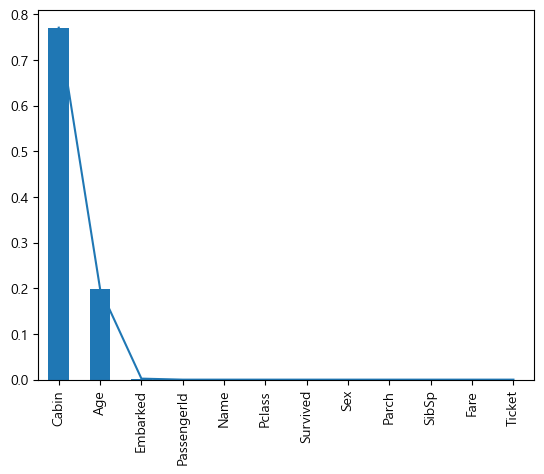

In [108]:
# NaN check null check
import matplotlib.pyplot as plt
titanic.isna().sum()
titanic.isna().mean() # 이게 많은 수인지 평균을 내서 보면 됌
titanic.isna().mean().sort_values(ascending=False)# 결측치 비율이 높은 순으로 (오름차순)
titanic.isna().mean().sort_values(ascending=False).plot() # 그래프 형식으로.
titanic.isna().mean().sort_values(ascending=False).plot(kind='bar')
plt

<Axes: >

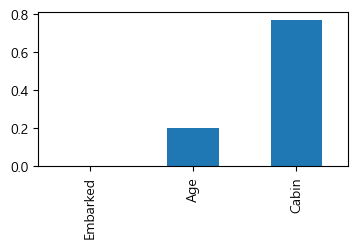

In [109]:
# 결측치가 있는 애들만 골라서 출력
import matplotlib.pyplot as plt

plt.figure(figsize = (4,2))
temp = titanic.isna().mean()
temp > 0
temp[temp > 0].sort_values().plot(kind='bar')
# titanic[titanic['Survived'] == 1] list는 가능.

In [110]:
%pip install missingno #결측치 시각화 전용 라이브러리로, 데이터프레임에서 NaN(결측치)이 어디에 얼마나 있는지 한눈에 볼 수 있는 그래프를 그려줘

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#결측치': Expected package name at the start of dependency specifier
    #결측치
    ^


<Axes: >

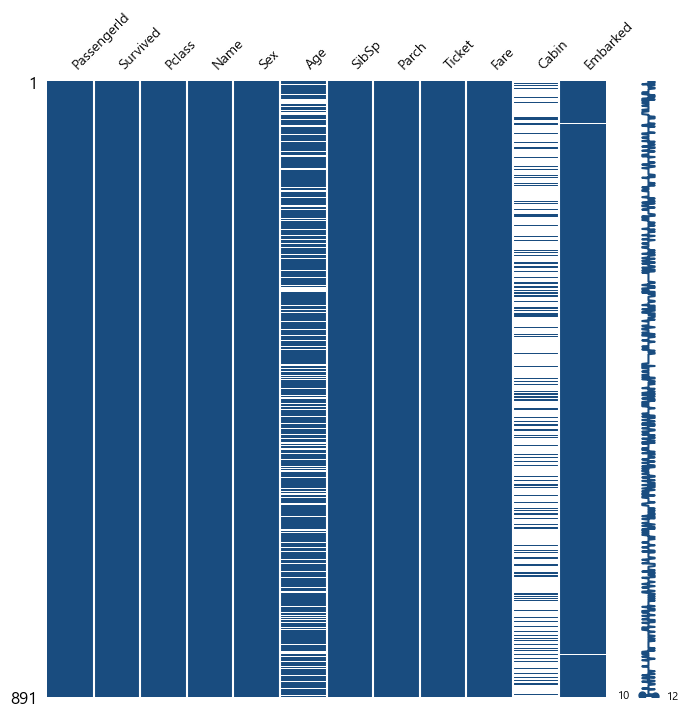

In [111]:
import missingno as msno


msno.matrix(df = titanic,figsize=(8,8),fontsize=10,color=(0.1,0.3,0.5))

# msno.bar(df=titanic, figsize=(8,8),fontsize=8,color=(0.1,0.3,0.6))

<Axes: >

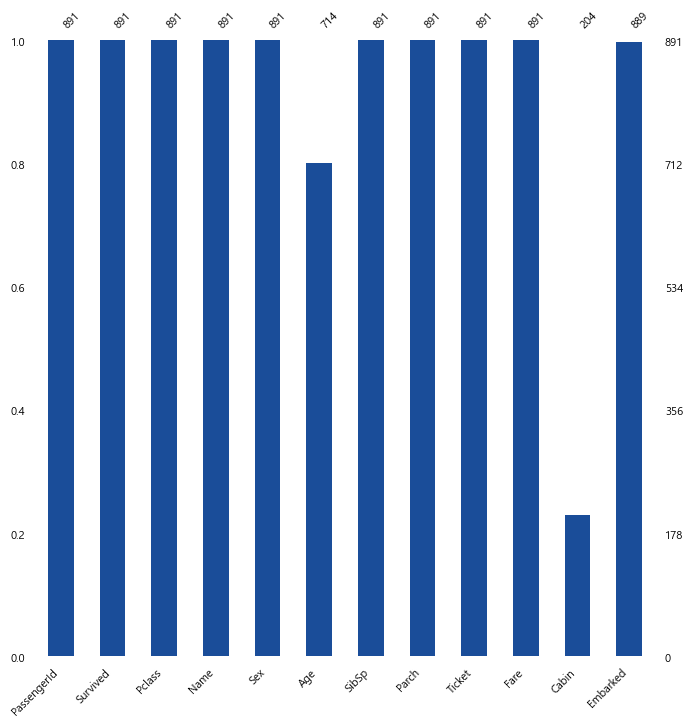

In [112]:
msno.bar(df=titanic, figsize=(8,8),fontsize=8,color=(0.1,0.3,0.6))

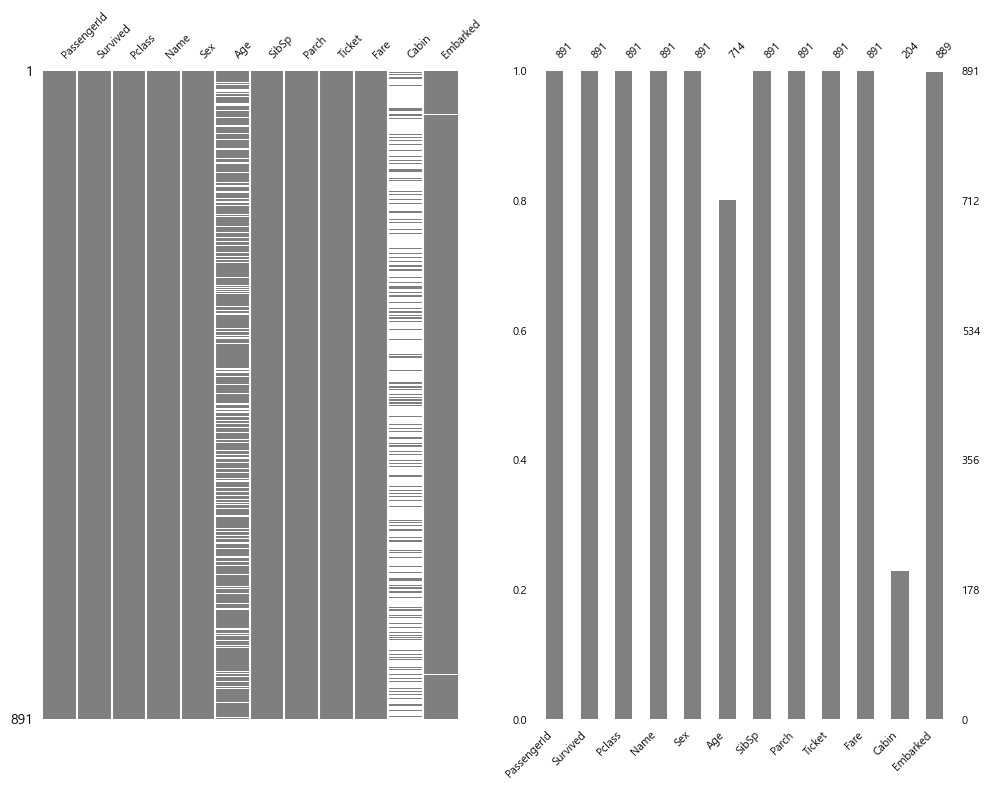

In [113]:
import missingno as msno

fig, axes = plt.subplots(1,2,figsize=(10,8))
msno.matrix(df=titanic,figsize=(4,4),fontsize=8,color=(0.5,0.5,0.5), ax=axes[0],sparkline=False)
msno.bar(df=titanic,figsize=(4,4),fontsize=8,color=(0.5,0.5,0.5), ax=axes[1])
plt.tight_layout()  # 그래프 사이의 간격을 떨어뜨려주는 역할
plt.show()


In [114]:
# age컬럼의 결측치가 있는 모든 row를 출력
import numpy as np
test = pd.DataFrame({
    'a' : [1,np.nan,6,np.nan],
    'b' : [2,5,6,np.nan],
    'c' : [3,5,9,3]
})
test[test.isna().any(axis=1)]

,a,b,c
1,NaN,5.0,5
3,NaN,NaN,3


In [115]:
missing_df = titanic[titanic.drop(columns=['Cabin']).isna().any(axis=1)]
missing_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [116]:
# Embarked 가 결측치인  row 데이터를 출력
titanic[titanic.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [117]:
k = 3
df_lists = []
for i in titanic[titanic.Embarked.isna()].index:
    df_lists.append(titanic.loc[i-k : i+k])

pd.concat(df_lists)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.00,0,0,2669,7.2292,NaN,C
61,62,1,1,"Icard, Miss. Amelie",female,38.00,0,0,113572,80.0000,B28,NaN
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.00,1,0,36973,83.4750,C83,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q


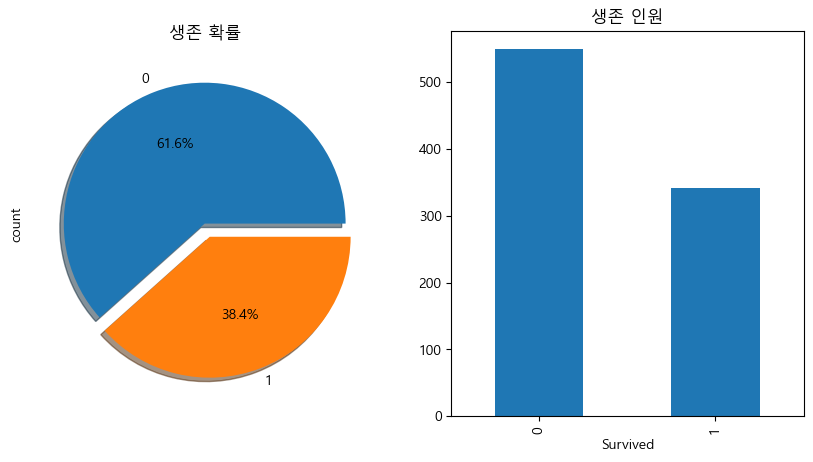

In [118]:
# 생존유무  pie 그래프

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

mpl.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우: 맑은 고딕
mpl.rcParams['axes.unicode_minus'] = False 

f,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('생존 확률')
titanic.Survived.value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode = [0,0.1],ax=ax[0])

ax[1].set_title('생존 인원')
titanic.Survived.value_counts().plot(kind='bar',ax=ax[1])
plt.show()

<Axes: xlabel='Pclass'>

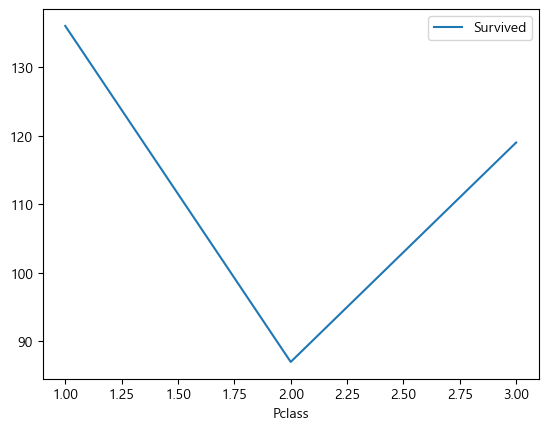

In [119]:
# 선실등급별 생존유무

titanic.groupby('Pclass')[['Survived']].sum().plot()

In [120]:
pd.crosstab(titanic['Pclass'] , titanic['Survived'], margins=True).style.background_gradient()

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [121]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [122]:
import seaborn as sns

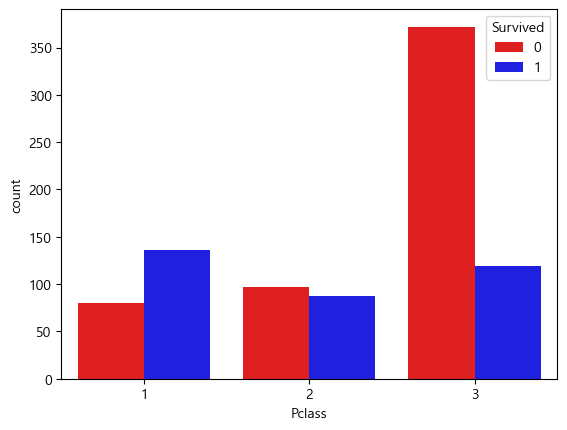

In [123]:
sns.countplot(data=titanic, x='Pclass',hue = 'Survived' , palette=['red','blue'])
plt.show()

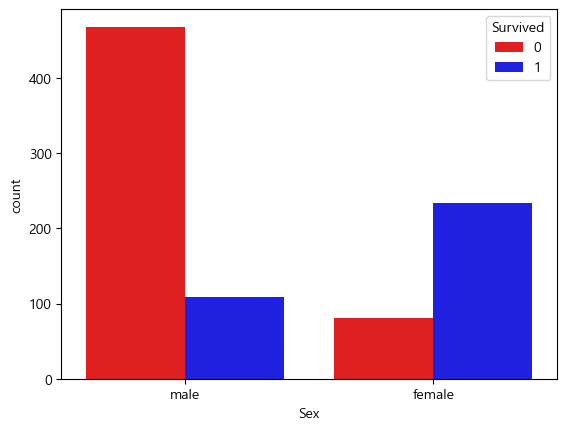

In [124]:
sns.countplot(data=titanic, x='Sex', hue='Survived' , palette=['red','blue']) # 대소문자 꼭 구별해야함/.....
plt.show()

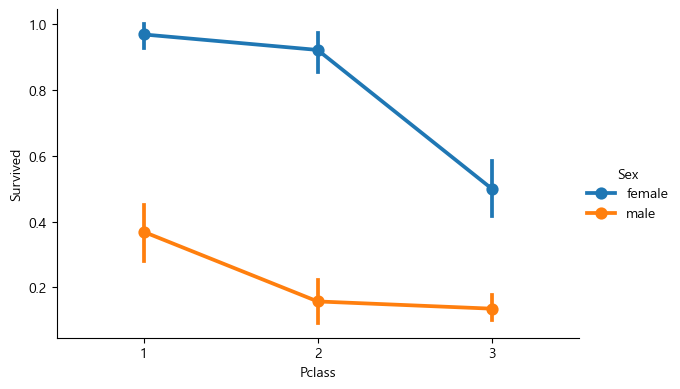

In [127]:

# 선실등급별, 성별에 따라서 생존확률이 높다는것을 알수 있음.. 
# 두 특성을 한꺼번에 비교하는 시각화 툴
#factorplot
sns.catplot(data=titanic,x='Pclass',y='Survived',hue='Sex',kind='point',height=4,aspect=1.5)
plt.show()

In [128]:
# 나이가 가장 낮은 승객, 높은승객 ,평균나이
titanic.Age.max(),titanic.Age.min(), titanic.Age.mean()

(np.float64(80.0), np.float64(0.42), np.float64(29.69911764705882))

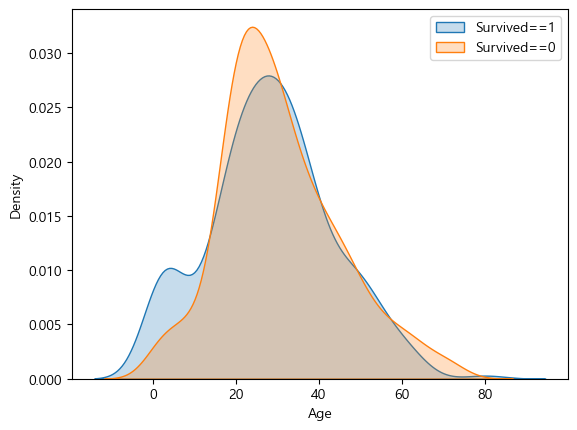

In [129]:
sns.kdeplot(
    data = titanic[titanic.Survived == 1], x='Age', label = 'Survived==1',fill=True
)

sns.kdeplot(
    data = titanic[titanic.Survived == 0], x='Age', label = 'Survived==0',fill=True
)
plt.legend(loc='best')
plt.show()

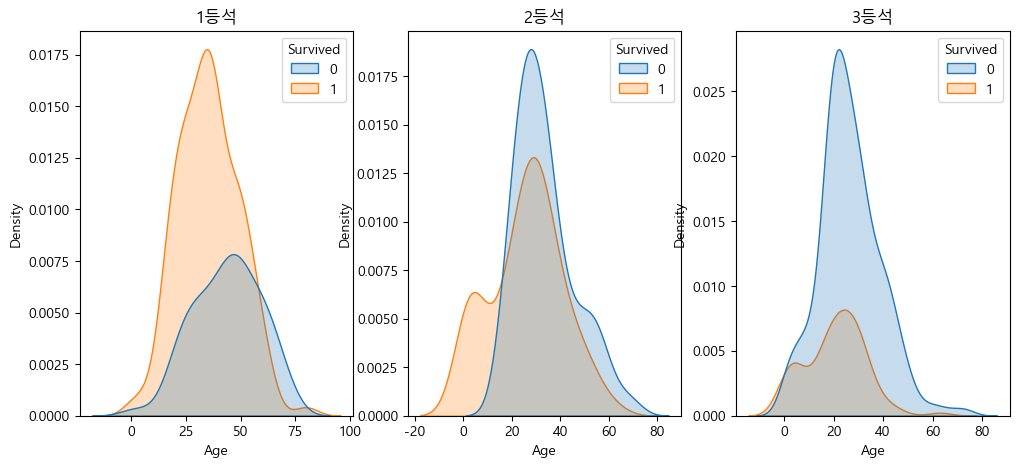

In [130]:
# 위의 표를 응용해서 Pclass 별로 생존 유무에 대한 시각화
f, ax = plt.subplots(1,3,figsize=(12,5))
ax[0].set_title('1등석')
ax[1].set_title('2등석')
ax[2].set_title('3등석')
sns.kdeplot(
    data = titanic[titanic.Pclass == 1], x='Age', hue='Survived', fill=True, ax=ax[0]
)
sns.kdeplot(
    data = titanic[titanic.Pclass == 2], x='Age', hue='Survived', fill=True, ax=ax[1]
)
sns.kdeplot(
    data = titanic[titanic.Pclass == 3], x='Age', hue='Survived', fill=True, ax=ax[2]
)
plt.show()

In [131]:
# 생존자중에서 나이가 어린 사람이 많다


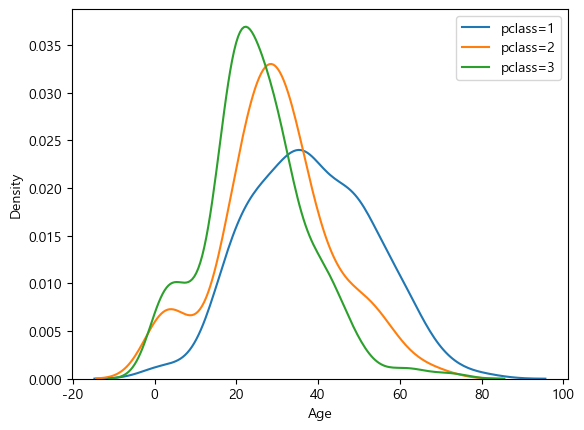

In [132]:
sns.kdeplot(
    data = titanic[titanic.Pclass == 1], x='Age',label = 'pclass=1'
)
sns.kdeplot(
    data = titanic[titanic.Pclass == 2], x='Age',label = 'pclass=2'
)
sns.kdeplot(
    data = titanic[titanic.Pclass == 3], x='Age',label = 'pclass=3'
)
plt.legend()
plt.show()

In [133]:
# 클래스가 높은수록 나이많은 사람의 비중이 커짐
# 나이대가 변화면서 생존률이 어떻게 될까

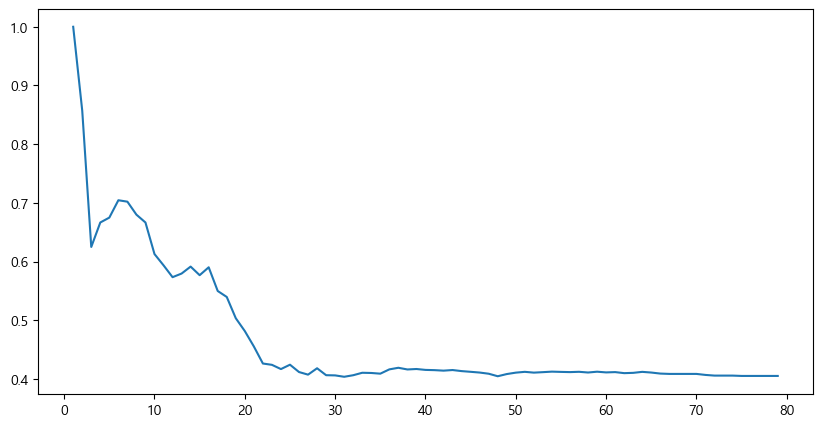

In [134]:
# 나이대의 범위를 점점 넓혀가면서 생존률의 변화
plt.figure(figsize=(10,5))
multi_age_range = [titanic[titanic.Age<i].Survived.mean() for i in range(1,80)]
plt.plot(range(1,80), multi_age_range)    
plt.show()